In [2]:
import seaborn as sns
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import os

In [267]:
df['CALL_START_DATE']

0        2023-02-17 10:56:31
1        2023-05-16 18:25:32
2        2023-05-23 12:58:16
3        2023-05-25 15:51:40
4        2023-05-12 17:43:43
                 ...        
118721   2023-01-18 14:42:04
118722   2023-01-12 09:46:15
118723   2021-04-22 19:31:04
118724   2023-05-12 14:33:33
118725   2023-04-03 07:36:07
Name: CALL_START_DATE, Length: 118726, dtype: datetime64[ns]

In [3]:
df = pd.read_pickle('./data/enhanced_data.pkl')

In [269]:
test = df[df['Customer_ID'] == 32332127].sort_values(by=['CALL_START_DATE'])
test[['Customer_ID', 'CALL_START_DATE', 'EOM_BAL', 'BOM_BAL']]

,Customer_ID,CALL_START_DATE,EOM_BAL,BOM_BAL
65388,32332127,2022-01-10 15:28:26,9251.34,9339.22
65387,32332127,2022-02-01 17:51:19,9251.34,9339.22
65386,32332127,2022-02-03 18:04:08,9251.34,9339.22
65385,32332127,2022-02-16 09:41:03,9251.34,9339.22
65384,32332127,2022-03-15 13:27:53,9251.34,9339.22
65383,32332127,2022-03-22 10:26:58,9251.34,9339.22
65382,32332127,2022-03-25 10:06:01,9251.34,9339.22
65381,32332127,2022-03-30 09:54:34,9251.34,9339.22
65380,32332127,2022-04-07 14:10:39,9251.34,9339.22
65379,32332127,2022-04-21 12:03:03,9251.34,9339.22


In [270]:
# Create a function to check if there are any changes in EOM_BAL and BOM_BAL
def check_changes(group):
    return (group['EOM_BAL'].nunique() > 1) or (group['BOM_BAL'].nunique() > 1)

# Group by Customer_ID and apply the function
changes = df.groupby('Customer_ID').apply(check_changes)

# Filter the Customer_IDs with changes
customers_with_changes = changes[changes == True].index

# Print the result
print("Customers with changes in EOM_BAL or BOM_BAL:", customers_with_changes.tolist())


Customers with changes in EOM_BAL or BOM_BAL: []


In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118726 entries, 0 to 118725
Data columns (total 95 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   Customer_ID                       118726 non-null  int64         
 1   BOOK_DT                           118726 non-null  datetime64[ns]
 2   FICO                              118726 non-null  int64         
 3   ORIGINAL_LOAN_AMOUNT              118726 non-null  float64       
 4   TOT_MO_PMT                        118726 non-null  float64       
 5   TERM                              118726 non-null  int64         
 6   NEW_USED_CD                       118726 non-null  object        
 7   LTV                               118726 non-null  float64       
 8   COSGN_FLG                         118726 non-null  object        
 9   MDL_YR                            118726 non-null  int64         
 10  MK                              

In [272]:
df['Change_balance'] = df['EOM_BAL'] - df['BOM_BAL']
df['outcome'] = np.where(df['Change_balance'] < 0, 1, 0)
df = df.drop(['Change_balance', 'EOM_BAL', 'BOM_BAL'], axis=1)

In [273]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print(cat_cols)

['NEW_USED_CD', 'COSGN_FLG', 'MK', 'SUBV_IND', 'SCOR_TIER_D', 'TIER_BOOK_CD', 'ASSIGNED_TEAM_NAME', 'RPC_INDICATOR', 'ACTIVITY_TYPE', 'CALL_\xadDISPOSITION', 'MDL', 'MODEL']


In [274]:
cat_cols.remove('NEW_USED_CD')
cat_cols.remove('COSGN_FLG')
df.drop(columns=cat_cols, inplace=True)

In [275]:
print(df['NEW_USED_CD'].value_counts())
print(df['COSGN_FLG'].value_counts())
df['NEW_USED_CD'] = pd.factorize(df['NEW_USED_CD'])[0]
df['COSGN_FLG'] = pd.factorize(df['COSGN_FLG'])[0]
print(df['NEW_USED_CD'].value_counts())
print(df['COSGN_FLG'].value_counts())

N    91792
U    26934
Name: NEW_USED_CD, dtype: int64
N    77403
Y    41323
Name: COSGN_FLG, dtype: int64
1    91792
0    26934
Name: NEW_USED_CD, dtype: int64
0    77403
1    41323
Name: COSGN_FLG, dtype: int64


In [276]:
import datetime
df['CALL_MON_YEAR'] = df['CALL_START_DATE'].dt.strftime('%Y-%m')

In [277]:
df['days_since_book'] = (df['CALL_START_DATE'] - df['BOOK_DT']).dt.round('D').dt.days

In [278]:
df['days_since_book'].value_counts()

 113     208
 141     196
 14      184
 112     182
 143     173
        ... 
 2353      1
 2358      1
-78        1
-110       1
 2344      1
Name: days_since_book, Length: 2392, dtype: int64

- remove all the records wih negative days since book

In [279]:
negative_rows = df[df['days_since_book'] < 0]

# Create a set of indices to remove based on Customer_ID and CALL_MON_YEAR
indices_to_remove = set()
for _, row in negative_rows.iterrows():
    same_customer = df[(df['Customer_ID'] == row['Customer_ID']) & (df['CALL_MON_YEAR'] == row['CALL_MON_YEAR'])]
    indices_to_remove.update(same_customer.index)

# Remove rows with the same Customer_ID and CALL_MON_YEAR
df = df.drop(index=indices_to_remove)

df

,Customer_ID,BOOK_DT,FICO,ORIGINAL_LOAN_AMOUNT,TOT_MO_PMT,TERM,NEW_USED_CD,LTV,COSGN_FLG,MDL_YR,...,RATIO_SIX,YR1_RESL_VLUE,YR2_RESL_VLUE,YR3_RESL_VLUE,YR4_RESL_VLUE,YR5_RESL_VLUE,YR6_RESL_VLUE,outcome,CALL_MON_YEAR,days_since_book
0,47509157,2021-09-01,617,34271.97,742.21,72,0,1.06,0,2017,...,0.109856,35711.0,31250.0,29218.0,27800.0,25928.0,23061.0,1,2023-02,534
1,35919987,2021-03-29,684,30046.00,540.13,72,0,1.23,1,2017,...,0.109856,35711.0,31250.0,29218.0,27800.0,25928.0,23061.0,0,2023-05,779
2,35919987,2021-03-29,684,30046.00,540.13,72,0,1.23,1,2017,...,0.109856,35711.0,31250.0,29218.0,27800.0,25928.0,23061.0,0,2023-05,786
3,35919987,2021-03-29,684,30046.00,540.13,72,0,1.23,1,2017,...,0.109856,35711.0,31250.0,29218.0,27800.0,25928.0,23061.0,0,2023-05,788
4,35919987,2021-03-29,684,30046.00,540.13,72,0,1.23,1,2017,...,0.109856,35711.0,31250.0,29218.0,27800.0,25928.0,23061.0,0,2023-05,775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118721,7198922,2019-03-05,632,15720.40,316.55,72,0,1.20,0,2017,...,0.034838,22800.0,20783.0,18984.0,16424.0,15833.0,14428.0,1,2023-01,1416
118722,7198922,2019-03-05,632,15720.40,316.55,72,0,1.20,0,2017,...,0.034838,22800.0,20783.0,18984.0,16424.0,15833.0,14428.0,1,2023-01,1409
118723,7877595,2021-02-03,751,17747.71,360.02,60,0,1.35,0,2017,...,NaN,31250.0,27800.0,25922.0,23456.0,20405.0,19947.0,1,2021-04,79
118724,7989148,2021-07-23,636,13894.91,252.52,72,0,0.74,0,2019,...,0.163551,NaN,NaN,NaN,NaN,NaN,NaN,0,2023-05,659


## remove null

In [284]:
right_df = df_train[['Customer_ID', 'CALL_MON_YEAR', 'past_repay_prob', 'PREVIOUS_MONTH_CALLS']]

In [288]:
cols = df_train.columns.to_list() + ['CALL_START_DATE']

In [289]:
cols

['Customer_ID',
 'CALL_MON_YEAR',
 'past_repay_prob',
 'PREVIOUS_MONTH_CALLS',
 'CALL_DPD',
 'DLNQNT_10_29_CNT',
 'days_since_book',
 'DLNQNT_60_89_CNT',
 'BUYER_CUSTOM_CREDIT_SCORE',
 'TOT_MO_PMT',
 'ORIGINAL_COMBINED_DEBT_TO_INCOME',
 'ORIGINAL_COMBINED_PAYMENT_TO_INC',
 'APPLICANT_AGE',
 'UNPAID_CASH_BALANCE_AMOUNT',
 'TOTAL_MONTHLY_PAYMENT_AMOUNT',
 'DLNQNT_30_59_CNT',
 'BUYER_CREDIT_SCORE',
 'HIGHEST_LOAN_AMOUNT',
 'TOTAL_BUREAU_PAYMENT_AMOUNT',
 'FICO',
 'TOTAL_INCOME_AMOUNT',
 'DLNQNT_90_CNT',
 'outcome',
 'CALL_START_DATE']

In [285]:
result_df = pd.merge(df, right_df, on=['Customer_ID', 'CALL_MON_YEAR'], how='left')

In [290]:
result_df = result_df[cols]

In [295]:
result_df['outcome'].value_counts()

0    95029
1    23675
Name: outcome, dtype: int64

In [293]:
import pickle

file_path = './data/result_df.pkl'

# export dataframes
with open(file_path, 'wb') as f:
    pickle.dump(result_df, f)

In [292]:
import pandas as pd
result_df = result_df.sort_values(['Customer_ID', 'CALL_START_DATE'])

grouped = result_df.groupby(['Customer_ID', 'CALL_MON_YEAR'])

def transform_outcome(group):
    if group['outcome'].any():  # If any of the rows for this group has outcome = 1
        group['outcome'] = 0  # Set all rows to 0
        group['outcome'].iloc[-1] = 1  # Set the last row to 1
    return group

result_df = grouped.apply(transform_outcome)
result_df.reset_index(drop=True, inplace=True)
result_df

,Customer_ID,CALL_MON_YEAR,past_repay_prob,PREVIOUS_MONTH_CALLS,CALL_DPD,DLNQNT_10_29_CNT,days_since_book,DLNQNT_60_89_CNT,BUYER_CUSTOM_CREDIT_SCORE,TOT_MO_PMT,...,TOTAL_MONTHLY_PAYMENT_AMOUNT,DLNQNT_30_59_CNT,BUYER_CREDIT_SCORE,HIGHEST_LOAN_AMOUNT,TOTAL_BUREAU_PAYMENT_AMOUNT,FICO,TOTAL_INCOME_AMOUNT,DLNQNT_90_CNT,outcome,CALL_START_DATE
0,7350,2023-05,1.0,0.0,35,1,661,0,779,293.78,...,310,1,775,2000,17,775,5000,0,0,2023-05-11 15:03:46
1,8328,2023-01,1.0,0.0,69,16,1043,7,599,599.49,...,1972,13,613,16887,0,613,8140,0,0,2023-01-24 15:34:29
2,8328,2023-01,1.0,0.0,69,16,1046,7,599,599.49,...,1972,13,613,16887,0,613,8140,0,0,2023-01-27 14:49:59
3,8328,2023-01,1.0,0.0,69,16,1046,7,599,599.49,...,1972,13,613,16887,0,613,8140,0,0,2023-01-28 10:39:56
4,8328,2023-01,1.0,0.0,69,16,1046,7,599,599.49,...,1972,13,613,16887,0,613,8140,0,0,2023-01-28 10:41:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118699,99992127,2023-03,1.0,0.0,10,0,163,0,708,555.58,...,612,0,745,7200,70,745,5000,0,1,2023-03-01 11:58:11
118700,99992127,2023-04,1.0,2.0,10,0,220,0,708,555.58,...,612,0,745,7200,70,745,5000,0,1,2023-04-26 12:00:47
118701,99995487,2022-05,1.0,0.0,8,5,497,0,750,484.84,...,3751,0,739,385000,817,739,7500,0,0,2022-05-16 12:03:06
118702,99995487,2022-05,1.0,0.0,8,5,497,0,750,484.84,...,3751,0,739,385000,817,739,7500,0,0,2022-05-16 12:03:53


In [280]:
df_select = df.copy()
df_select.drop(columns=['BOOK_DT', "CALL_START_DATE", "CALL_MON_YEAR", "Customer_ID"], inplace = True)

In [74]:
percentage_null = df_select.isnull().mean().sort_values(ascending=False).reset_index()
percentage_null.columns = ['variable', 'null percentage']
display(percentage_null)

,variable,null percentage
0,YR6_RESL_VLUE,0.202529
1,YR5_RESL_VLUE,0.202529
2,YR4_RESL_VLUE,0.202529
3,YR3_RESL_VLUE,0.202529
4,YR2_RESL_VLUE,0.202529
...,...,...
77,DEPARTMENT_STORE_MONTHLY_PAYMENT,0.000000
78,CURRENT_EMPLOYMENT_DURATION_NUMB,0.000000
79,CURRENT_AUTOMOBILE_ACCOUNTS_COUN,0.000000
80,CREDIT_REPORT_ACCOUNT_DISPUTE_CO,0.000000


In [75]:
filtered_variables = percentage_null[percentage_null['null percentage'] == 0]['variable']
df_select = df_select[filtered_variables]
df_select

,REVOLVING_SATISFACTORY_ACCOUNT_C,TOTAL_MONTHLY_PAYMENT_AMOUNT,TOTAL_BUREAU_PAYMENT_AMOUNT,TOTAL_BANKRUPTCY_COUNT,REVOLVING_TRADE_LINE_COUNT,REVOLVING_TRADE_LINE_PERCENT,FICO,REVOLVING_CREDIT_MONTHLY_PAYMENT,REVOLVING_CREDIT_HIGH_AMOUNT,REVOLVING_CREDIT_BALANCE_AMOUNT,...,HIGHEST_LOAN_AMOUNT,REVOLVING_CREDIT_BALANCE_RATIO,FINANCE_COMPANY_TRADE_LINE_COUNT,EVER_TRADE_PERCENT,DEPARTMENT_STORE_TRADE_COUNT,DEPARTMENT_STORE_MONTHLY_PAYMENT,CURRENT_EMPLOYMENT_DURATION_NUMB,CURRENT_AUTOMOBILE_ACCOUNTS_COUN,CREDIT_REPORT_ACCOUNT_DISPUTE_CO,days_since_book
0,3,1203,468,0,4,57,617,0,4100,1455,...,33443,57,0,0.28571,2,0,7,0,0,534
1,9,1621,69,0,11,92,684,68,13032,2022,...,14545,92,0,0.16667,7,68,0,0,0,779
2,9,1621,69,0,11,92,684,68,13032,2022,...,14545,92,0,0.16667,7,68,0,0,0,786
3,9,1621,69,0,11,92,684,68,13032,2022,...,14545,92,0,0.16667,7,68,0,0,0,788
4,9,1621,69,0,11,92,684,68,13032,2022,...,14545,92,0,0.16667,7,68,0,0,0,775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118721,2,582,315,0,2,67,632,0,0,0,...,12189,67,0,0.00000,1,0,1,1,0,1416
118722,2,582,315,0,2,67,632,0,0,0,...,12189,67,0,0.00000,1,0,1,1,0,1409
118723,4,1520,876,0,4,80,751,0,10000,579,...,52864,80,0,0.00000,1,0,2,1,0,79
118724,5,2194,1067,0,10,71,636,0,11975,3458,...,41254,71,0,0.41667,2,0,2,1,0,659


## remove correlated variables

In [76]:
correlation_matrix = df_select.corr()
feature_correlation_threshold = 0.90  

feature_correlations = correlation_matrix.unstack().sort_values(ascending=False)
feature_correlations = feature_correlations[feature_correlations != 1.0]  # Exclude self-correlations

print("All feature correlations:")
for idx, correlation in feature_correlations.items():
    feature1, feature2 = idx
    print(f"({feature1}) - ({feature2}): {correlation}")

print("--------------------------------------------------")

# Filter highly correlated features
highly_correlated_features = feature_correlations[abs(feature_correlations) > feature_correlation_threshold].index.tolist()

print("Highly correlated features to consider removing:")
print(highly_correlated_features)

All feature correlations:
(TRADE_LINES_RATED_COUNT) - (TRADE_LINE_COUNT): 0.9840285568751101
(TRADE_LINE_COUNT) - (TRADE_LINES_RATED_COUNT): 0.9840285568751101
(ORIGINAL_LOAN_AMOUNT) - (UNPAID_CASH_BALANCE_AMOUNT): 0.982599681807103
(UNPAID_CASH_BALANCE_AMOUNT) - (ORIGINAL_LOAN_AMOUNT): 0.982599681807103
(COBUYER_CREDIT_SCORE) - (COBUYER_CUSTOM_CREDIT_SCORE): 0.960258745303896
(COBUYER_CUSTOM_CREDIT_SCORE) - (COBUYER_CREDIT_SCORE): 0.960258745303896
(REVOLVING_SATISFACTORY_ACCOUNT_C) - (REVOLVING_TRADE_LINE_COUNT): 0.9499660123621252
(REVOLVING_TRADE_LINE_COUNT) - (REVOLVING_SATISFACTORY_ACCOUNT_C): 0.9499660123621252
(COBUYER_CUSTOM_CREDIT_SCORE) - (COSGN_FLG): 0.9313778011282926
(COSGN_FLG) - (COBUYER_CUSTOM_CREDIT_SCORE): 0.9313778011282926
(COSGN_FLG) - (COBUYER_CREDIT_SCORE): 0.9197496383938377
(COBUYER_CREDIT_SCORE) - (COSGN_FLG): 0.9197496383938377
(REVOLVING_TRADE_LINE_COUNT) - (DEPARTMENT_STORE_TRADE_COUNT): 0.8840958226465743
(DEPARTMENT_STORE_TRADE_COUNT) - (REVOLVING_TRADE_

In [77]:
df_select = df_select.drop(['TRADE_LINES_RATED_COUNT', 'ORIGINAL_LOAN_AMOUNT', 'COBUYER_CUSTOM_CREDIT_SCORE', 'REVOLVING_SATISFACTORY_ACCOUNT_C', 'DEPARTMENT_STORE_TRADE_COUNT'], axis=1)

In [78]:
new_column_order = ['Customer_ID', 'CALL_MON_YEAR', 'CALL_START_DATE'] + df_select.columns.tolist()

df_select = df[new_column_order]
df_select

,Customer_ID,CALL_MON_YEAR,CALL_START_DATE,TOTAL_MONTHLY_PAYMENT_AMOUNT,TOTAL_BUREAU_PAYMENT_AMOUNT,TOTAL_BANKRUPTCY_COUNT,REVOLVING_TRADE_LINE_COUNT,REVOLVING_TRADE_LINE_PERCENT,FICO,REVOLVING_CREDIT_MONTHLY_PAYMENT,...,INQUIRY_COUNT,HIGHEST_LOAN_AMOUNT,REVOLVING_CREDIT_BALANCE_RATIO,FINANCE_COMPANY_TRADE_LINE_COUNT,EVER_TRADE_PERCENT,DEPARTMENT_STORE_MONTHLY_PAYMENT,CURRENT_EMPLOYMENT_DURATION_NUMB,CURRENT_AUTOMOBILE_ACCOUNTS_COUN,CREDIT_REPORT_ACCOUNT_DISPUTE_CO,days_since_book
0,47509157,2023-02,2023-02-17 10:56:31,1203,468,0,4,57,617,0,...,0,33443,57,0,0.28571,0,7,0,0,534
1,35919987,2023-05,2023-05-16 18:25:32,1621,69,0,11,92,684,68,...,5,14545,92,0,0.16667,68,0,0,0,779
2,35919987,2023-05,2023-05-23 12:58:16,1621,69,0,11,92,684,68,...,5,14545,92,0,0.16667,68,0,0,0,786
3,35919987,2023-05,2023-05-25 15:51:40,1621,69,0,11,92,684,68,...,5,14545,92,0,0.16667,68,0,0,0,788
4,35919987,2023-05,2023-05-12 17:43:43,1621,69,0,11,92,684,68,...,5,14545,92,0,0.16667,68,0,0,0,775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118721,7198922,2023-01,2023-01-18 14:42:04,582,315,0,2,67,632,0,...,2,12189,67,0,0.00000,0,1,1,0,1416
118722,7198922,2023-01,2023-01-12 09:46:15,582,315,0,2,67,632,0,...,2,12189,67,0,0.00000,0,1,1,0,1409
118723,7877595,2021-04,2021-04-22 19:31:04,1520,876,0,4,80,751,0,...,8,52864,80,0,0.00000,0,2,1,0,79
118724,7989148,2023-05,2023-05-12 14:33:33,2194,1067,0,10,71,636,0,...,6,41254,71,0,0.41667,0,2,1,0,659


## convert to monthly record

In [93]:
df_reduced_temp = df_select.sort_values(by=['Customer_ID', 'CALL_START_DATE'])
df_reduced = df_reduced_temp.groupby(['Customer_ID', 'CALL_MON_YEAR']).last().reset_index()

df_reduced['CALLS_CURRENT_MONTH'] = df_reduced_temp.groupby(['Customer_ID', 'CALL_MON_YEAR'])['Customer_ID'].transform(lambda x: x.count())
df_reduced['PREVIOUS_MONTH_CALLS'] = df_reduced.groupby('Customer_ID')['CALLS_CURRENT_MONTH'].shift()

df_reduced

,Customer_ID,CALL_MON_YEAR,CALL_START_DATE,TOTAL_MONTHLY_PAYMENT_AMOUNT,TOTAL_BUREAU_PAYMENT_AMOUNT,TOTAL_BANKRUPTCY_COUNT,REVOLVING_TRADE_LINE_COUNT,REVOLVING_TRADE_LINE_PERCENT,FICO,REVOLVING_CREDIT_MONTHLY_PAYMENT,...,REVOLVING_CREDIT_BALANCE_RATIO,FINANCE_COMPANY_TRADE_LINE_COUNT,EVER_TRADE_PERCENT,DEPARTMENT_STORE_MONTHLY_PAYMENT,CURRENT_EMPLOYMENT_DURATION_NUMB,CURRENT_AUTOMOBILE_ACCOUNTS_COUN,CREDIT_REPORT_ACCOUNT_DISPUTE_CO,days_since_book,CALLS_CURRENT_MONTH,PREVIOUS_MONTH_CALLS
0,7350,2023-05,2023-05-11 15:03:46,310,17,0,1,100,775,0,...,100,0,0.0,0,3,0,0,661,1.0,NaN
1,8328,2023-01,2023-01-31 14:55:47,1972,0,0,0,0,613,28,...,0,0,0.0,0,1,1,0,1050,8.0,NaN
2,8328,2023-02,2023-02-28 14:37:49,1972,0,0,0,0,613,28,...,0,0,0.0,0,1,1,0,1078,8.0,8.0
3,8328,2023-03,2023-03-29 11:19:14,1972,0,0,0,0,613,28,...,0,0,0.0,0,1,1,0,1106,8.0,8.0
4,8328,2023-04,2023-04-20 11:46:45,1972,0,0,0,0,613,28,...,0,0,0.0,0,1,1,0,1128,8.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33069,99987007,2023-02,2023-02-21 12:31:02,1243,746,0,3,6,756,38,...,6,46,0.0,38,20,1,0,786,3.0,NaN
33070,99987007,2023-03,2023-03-17 13:57:01,1243,746,0,3,6,756,38,...,6,46,0.0,38,20,1,0,810,3.0,3.0
33071,99992127,2023-03,2023-03-01 11:58:11,612,70,0,4,57,745,0,...,57,1,0.0,0,5,0,0,163,2.0,NaN
33072,99992127,2023-04,2023-04-26 12:00:47,612,70,0,4,57,745,0,...,57,1,0.0,0,5,0,0,220,2.0,2.0


In [94]:
df_reduced['PREVIOUS_MONTH_CALLS'] = df_reduced['PREVIOUS_MONTH_CALLS'].fillna(0)

## remove variables with little variance

In [95]:
from sklearn.feature_selection import VarianceThreshold

df_selected = df_reduced.drop(['Customer_ID', 'CALL_MON_YEAR', 'CALL_START_DATE'], axis=1)
threshold = 0.1
selector = VarianceThreshold(threshold=threshold)
selector.fit(df_selected)

# Get the boolean mask of selected features
selected_features = selector.get_support()
selected_features

# Get the indices of selected features
selected_indices = np.where(selected_features)[0]

# Subset your feature matrix with the selected features
df_selected = df_selected.iloc[:, selected_indices]

new_column_order = ['Customer_ID', 'CALL_MON_YEAR'] + df_selected.columns.tolist()
df_reduced = df_reduced[new_column_order]

df_reduced

,Customer_ID,CALL_MON_YEAR,TOTAL_MONTHLY_PAYMENT_AMOUNT,TOTAL_BUREAU_PAYMENT_AMOUNT,REVOLVING_TRADE_LINE_COUNT,REVOLVING_TRADE_LINE_PERCENT,FICO,REVOLVING_CREDIT_MONTHLY_PAYMENT,REVOLVING_CREDIT_HIGH_AMOUNT,REVOLVING_CREDIT_BALANCE_AMOUNT,...,HIGHEST_LOAN_AMOUNT,REVOLVING_CREDIT_BALANCE_RATIO,FINANCE_COMPANY_TRADE_LINE_COUNT,DEPARTMENT_STORE_MONTHLY_PAYMENT,CURRENT_EMPLOYMENT_DURATION_NUMB,CURRENT_AUTOMOBILE_ACCOUNTS_COUN,CREDIT_REPORT_ACCOUNT_DISPUTE_CO,days_since_book,CALLS_CURRENT_MONTH,PREVIOUS_MONTH_CALLS
0,7350,2023-05,310,17,1,100,775,0,2000,17,...,2000,100,0,0,3,0,0,661,1.0,0.0
1,8328,2023-01,1972,0,0,0,613,28,0,0,...,16887,0,0,0,1,1,0,1050,8.0,0.0
2,8328,2023-02,1972,0,0,0,613,28,0,0,...,16887,0,0,0,1,1,0,1078,8.0,8.0
3,8328,2023-03,1972,0,0,0,613,28,0,0,...,16887,0,0,0,1,1,0,1106,8.0,8.0
4,8328,2023-04,1972,0,0,0,613,28,0,0,...,16887,0,0,0,1,1,0,1128,8.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33069,99987007,2023-02,1243,746,3,6,756,38,1805,163,...,27514,6,46,38,20,1,0,786,3.0,0.0
33070,99987007,2023-03,1243,746,3,6,756,38,1805,163,...,27514,6,46,38,20,1,0,810,3.0,3.0
33071,99992127,2023-03,612,70,4,57,745,0,8700,1394,...,7200,57,1,0,5,0,0,163,2.0,0.0
33072,99992127,2023-04,612,70,4,57,745,0,8700,1394,...,7200,57,1,0,5,0,0,220,2.0,2.0


## add a new feature for tracking past repay probability

In [145]:
df_reduced = df_reduced.sort_values(['Customer_ID', 'CALL_MON_YEAR'])

# Function to calculate the past repayment probability
def calculate_past_repay_prob(group):
    group['past_repay_prob'] = 1.0
    for i in range(1, len(group)):
        past_payments = group['outcome'].iloc[:i]
        group['past_repay_prob'].iloc[i] = past_payments.mean()
    return group

# Apply the function to each group of Customer_ID
df_reduced = df_reduced.groupby('Customer_ID').apply(calculate_past_repay_prob)

df_reduced[['Customer_ID', 'CALL_MON_YEAR', 'outcome', 'past_repay_prob']]

,Customer_ID,CALL_MON_YEAR,outcome,past_repay_prob
0,7350,2023-05,0,1.0
1,8328,2023-01,0,1.0
2,8328,2023-02,0,0.0
3,8328,2023-03,0,0.0
4,8328,2023-04,0,0.0
...,...,...,...,...
33069,99987007,2023-02,0,1.0
33070,99987007,2023-03,0,0.0
33071,99992127,2023-03,1,1.0
33072,99992127,2023-04,1,1.0


In [142]:
df_reduced['past_repay_prob'].value_counts().head(30)

1.0    27836
0.0     5238
Name: past_repay_prob, dtype: int64

In [136]:
test = df_reduced[df_reduced['Customer_ID'] == 32332127]
test[['Customer_ID', 'CALL_MON_YEAR', 'outcome', 'past_repay_prob']]

In [102]:
# Group by Customer_ID and count the number of records for each
customer_counts = df_sequential.groupby('Customer_ID').size()

# Get the Customer_ID with the maximum count
most_records_customer = customer_counts.idxmax()

# Retrieve all the records for that customer
most_records_customer_data = df_reduced[df_reduced['Customer_ID'] == most_records_customer]

most_records_customer_data


,Customer_ID,CALL_MON_YEAR,TOTAL_MONTHLY_PAYMENT_AMOUNT,TOTAL_BUREAU_PAYMENT_AMOUNT,REVOLVING_TRADE_LINE_COUNT,REVOLVING_TRADE_LINE_PERCENT,FICO,REVOLVING_CREDIT_MONTHLY_PAYMENT,REVOLVING_CREDIT_HIGH_AMOUNT,REVOLVING_CREDIT_BALANCE_AMOUNT,...,REVOLVING_CREDIT_BALANCE_RATIO,FINANCE_COMPANY_TRADE_LINE_COUNT,DEPARTMENT_STORE_MONTHLY_PAYMENT,CURRENT_EMPLOYMENT_DURATION_NUMB,CURRENT_AUTOMOBILE_ACCOUNTS_COUN,CREDIT_REPORT_ACCOUNT_DISPUTE_CO,days_since_book,CALLS_CURRENT_MONTH,PREVIOUS_MONTH_CALLS,past_repay_prob
17677,41259077,2022-01,3567,1907,27,84,697,244,37933,13935,...,84,0,217,2,2,0,1446,2.0,0.0,1.0
17678,41259077,2022-02,3567,1907,27,84,697,244,37933,13935,...,84,0,217,2,2,0,1480,16.0,2.0,1.0
17679,41259077,2022-03,3567,1907,27,84,697,244,37933,13935,...,84,0,217,2,2,0,1515,15.0,16.0,1.0
17680,41259077,2022-04,3567,1907,27,84,697,244,37933,13935,...,84,0,217,2,2,0,1536,15.0,15.0,1.0
17681,41259077,2022-05,3567,1907,27,84,697,244,37933,13935,...,84,0,217,2,2,0,1562,15.0,15.0,1.0
17682,41259077,2022-06,3567,1907,27,84,697,244,37933,13935,...,84,0,217,2,2,0,1606,15.0,15.0,1.0
17683,41259077,2022-07,3567,1907,27,84,697,244,37933,13935,...,84,0,217,2,2,0,1632,9.0,15.0,1.0
17684,41259077,2022-08,3567,1907,27,84,697,244,37933,13935,...,84,0,217,2,2,0,1667,15.0,9.0,1.0
17685,41259077,2022-09,3567,1907,27,84,697,244,37933,13935,...,84,0,217,2,2,0,1672,7.0,15.0,1.0
17686,41259077,2022-10,3567,1907,27,84,697,244,37933,13935,...,84,0,217,2,2,0,1725,15.0,7.0,1.0


In [104]:
print(np.mean(customer_counts))
print(np.median(customer_counts))
customer_counts.value_counts()

2.2170532242928007
2.0


1     6279
2     3806
3     2339
4     1423
5      576
6      197
7      122
8       90
9       46
10      22
11      12
12       6
dtype: int64

In [99]:
df_reduced["past_repay_prob"].value_counts()

1.0    21866
0.0     2569
Name: past_repay_prob, dtype: int64

In [147]:
import pickle

file_path = './data/df_reduced.pkl'

# note that df_reduced contains CALLS_CURRENT_MONTH, need to remove when training
with open(file_path, 'wb') as f:
    pickle.dump(df_reduced, f)

## feature importance selection

In [144]:
df_reduced = pd.read_pickle('data/df_reduced.pkl')

In [148]:
df_reduced = df_reduced.drop(['CALLS_CURRENT_MONTH'], axis=1)

In [149]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33074 entries, 0 to 33073
Data columns (total 62 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Customer_ID                       33074 non-null  int64  
 1   CALL_MON_YEAR                     33074 non-null  object 
 2   TOTAL_MONTHLY_PAYMENT_AMOUNT      33074 non-null  int64  
 3   TOTAL_BUREAU_PAYMENT_AMOUNT       33074 non-null  int64  
 4   REVOLVING_TRADE_LINE_COUNT        33074 non-null  int64  
 5   REVOLVING_TRADE_LINE_PERCENT      33074 non-null  int64  
 6   FICO                              33074 non-null  int64  
 7   REVOLVING_CREDIT_MONTHLY_PAYMENT  33074 non-null  int64  
 8   REVOLVING_CREDIT_HIGH_AMOUNT      33074 non-null  int64  
 9   REVOLVING_CREDIT_BALANCE_AMOUNT   33074 non-null  int64  
 10  RESIDENCE_DURATION_NUMBER         33074 non-null  int64  
 11  TRADE_LINE_COUNT                  33074 non-null  int64  
 12  PERS

In [150]:
df_reduced['outcome'].value_counts()

1    23675
0     9399
Name: outcome, dtype: int64

In [160]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

target_variable = 'outcome'

features = df_reduced.drop(columns=[target_variable, 'Customer_ID', 'CALL_MON_YEAR'])
target = df_reduced[target_variable]

# Create a StandardScaler object
scaler = StandardScaler()

# Standard scale the features
scaled_features = scaler.fit_transform(features)

# Create a RandomForestClassifier with the scaled features
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(scaled_features, target)
importances = rf_classifier.feature_importances_

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance DataFrame
print(feature_importance_df)

                             Feature  Importance
58                   past_repay_prob    0.339782
57              PREVIOUS_MONTH_CALLS    0.042037
11                          CALL_DPD    0.039405
17                  DLNQNT_10_29_CNT    0.026165
56                   days_since_book    0.019286
19                  DLNQNT_60_89_CNT    0.017797
32         BUYER_CUSTOM_CREDIT_SCORE    0.016811
37                        TOT_MO_PMT    0.016725
25  ORIGINAL_COMBINED_DEBT_TO_INCOME    0.016494
24  ORIGINAL_COMBINED_PAYMENT_TO_INC    0.016395
12                     APPLICANT_AGE    0.016284
40        UNPAID_CASH_BALANCE_AMOUNT    0.016197
0       TOTAL_MONTHLY_PAYMENT_AMOUNT    0.016189
30          DISPOSABLE_INCOME_AMOUNT    0.016141
28                BUYER_CREDIT_SCORE    0.015964
49               HIGHEST_LOAN_AMOUNT    0.015751
1        TOTAL_BUREAU_PAYMENT_AMOUNT    0.015292
4                               FICO    0.015246
31               TOTAL_INCOME_AMOUNT    0.015078
18                  

In [161]:
feature_importance_df

,Feature,Importance
58,past_repay_prob,0.339782
57,PREVIOUS_MONTH_CALLS,0.042037
11,CALL_DPD,0.039405
17,DLNQNT_10_29_CNT,0.026165
56,days_since_book,0.019286
19,DLNQNT_60_89_CNT,0.017797
32,BUYER_CUSTOM_CREDIT_SCORE,0.016811
37,TOT_MO_PMT,0.016725
25,ORIGINAL_COMBINED_DEBT_TO_INCOME,0.016494
24,ORIGINAL_COMBINED_PAYMENT_TO_INC,0.016395


In [162]:
# Select the top 20 features
top_20_features = feature_importance_df.head(19)
top_20_features = top_20_features.append(feature_importance_df.loc[20])

C:\Users\rheah\AppData\Local\Temp\ipykernel_4368\1720414312.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_20_features = top_20_features.append(feature_importance_df.loc[20])


In [163]:
top_20_features.loc[20, 'Importance'] = 0.014965

In [164]:
top_20_features.loc[30, 'Feature'] = "DLNQNT_30_59_CNT"

In [165]:
top_20_features

,Feature,Importance
58,past_repay_prob,0.339782
57,PREVIOUS_MONTH_CALLS,0.042037
11,CALL_DPD,0.039405
17,DLNQNT_10_29_CNT,0.026165
56,days_since_book,0.019286
19,DLNQNT_60_89_CNT,0.017797
32,BUYER_CUSTOM_CREDIT_SCORE,0.016811
37,TOT_MO_PMT,0.016725
25,ORIGINAL_COMBINED_DEBT_TO_INCOME,0.016494
24,ORIGINAL_COMBINED_PAYMENT_TO_INC,0.016395


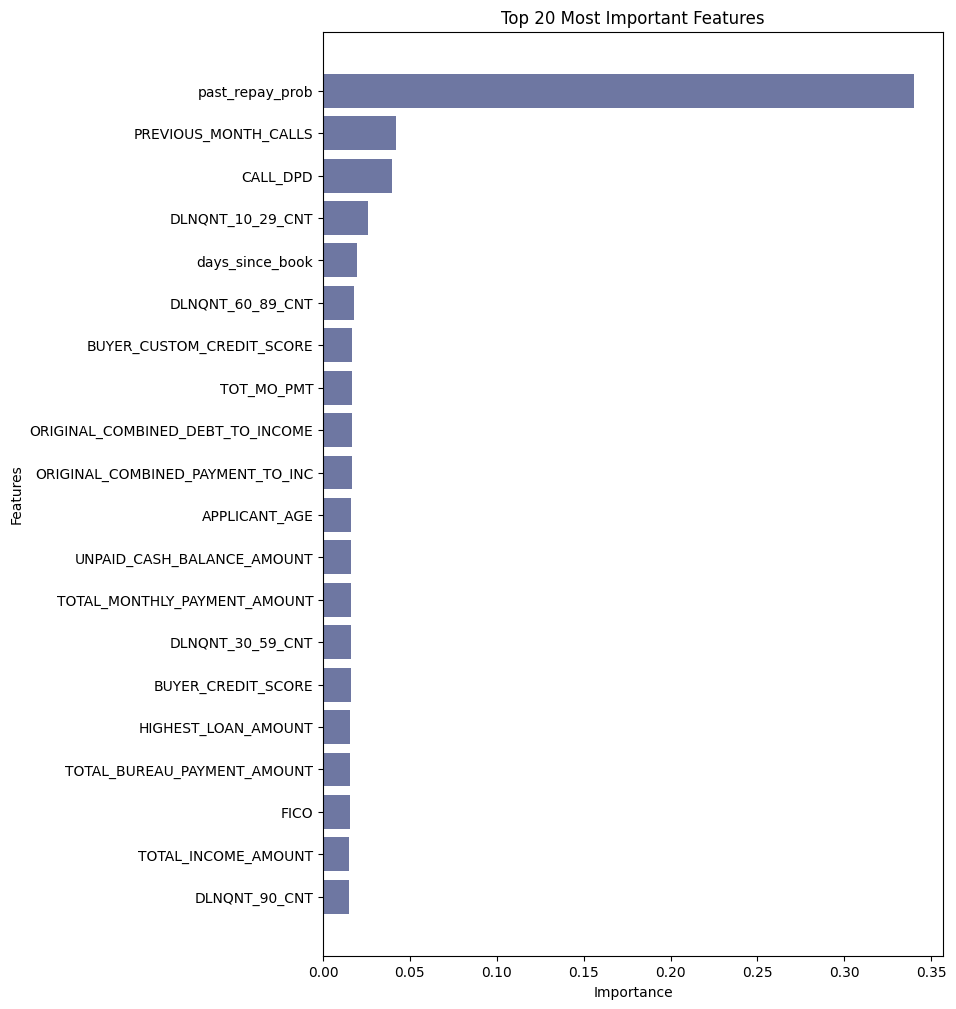

In [166]:
# Plot the top 20 most important features
plt.figure(figsize=(8, 12))
plt.barh(top_20_features['Feature'], top_20_features['Importance'], color='#6E77A2')
plt.title('Top 20 Most Important Features')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis() # This will invert the y-axis so that the top feature is at the top
plt.show()

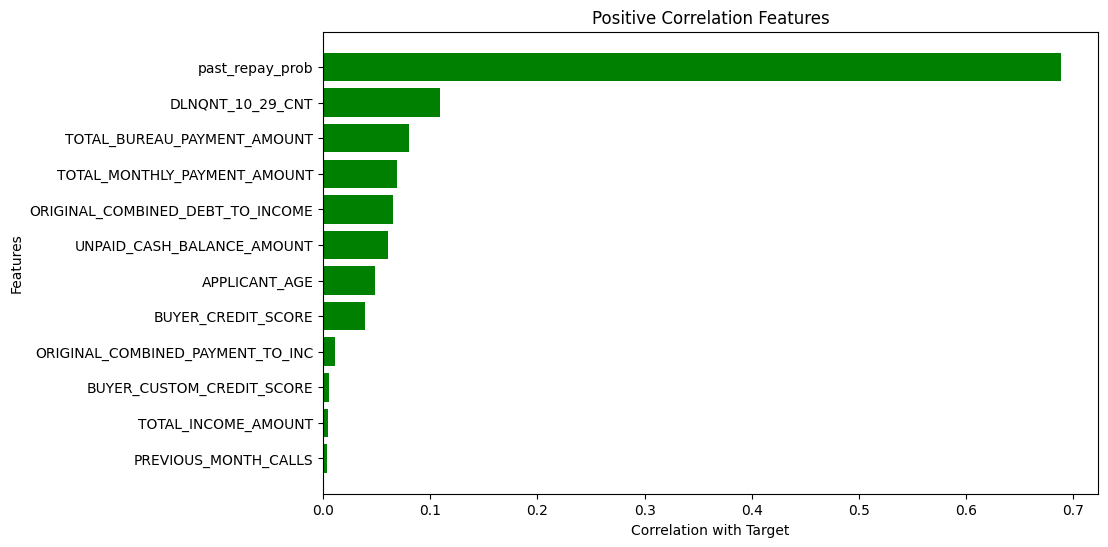

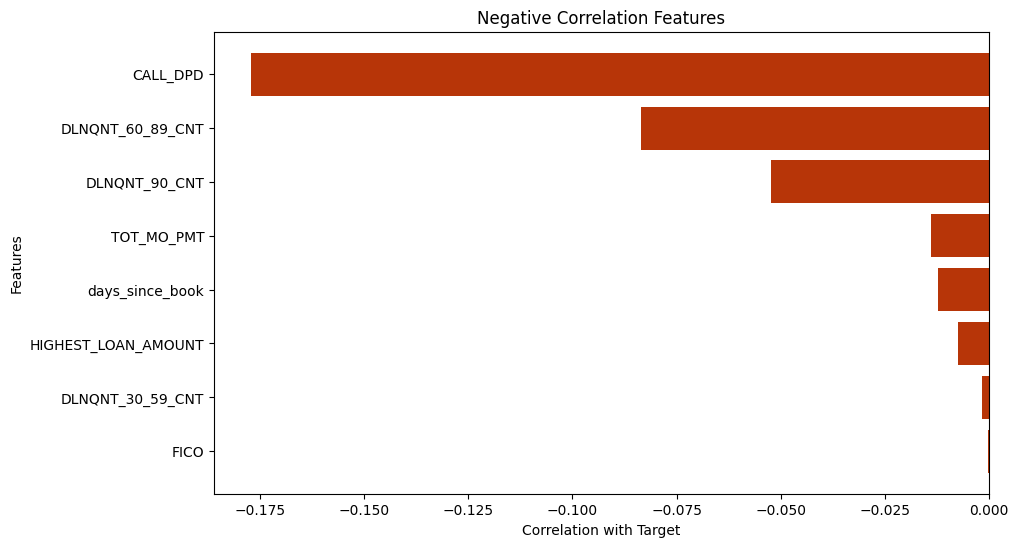

In [168]:
top_20_feature_names = top_20_features['Feature'].tolist()
top_20_features_data = features[top_20_feature_names]


correlations = top_20_features_data.apply(lambda x: x.corr(target))

# Create DataFrame with features and their corresponding correlation
correlation_df = pd.DataFrame({'Feature': top_20_features_data.columns, 'Correlation': correlations}).reset_index(drop=True)

# Sort features by correlation
correlation_df = correlation_df.sort_values(by='Correlation', ascending=False)

# Divide into positive and negative correlations
positive_correlation_features = correlation_df[correlation_df['Correlation'] > 0]
negative_correlation_features = correlation_df[correlation_df['Correlation'] < 0]

# Plot positive correlation features
plt.figure(figsize=(10, 6))
plt.barh(positive_correlation_features['Feature'], positive_correlation_features['Correlation'], color='g')
plt.title('Positive Correlation Features')
plt.xlabel('Correlation with Target')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.show()

# Plot negative correlation features
plt.figure(figsize=(10, 6))
plt.barh(negative_correlation_features['Feature'], negative_correlation_features['Correlation'], color='#B73508')
plt.title('Negative Correlation Features')
plt.xlabel('Correlation with Target')
plt.ylabel('Features')
plt.show()


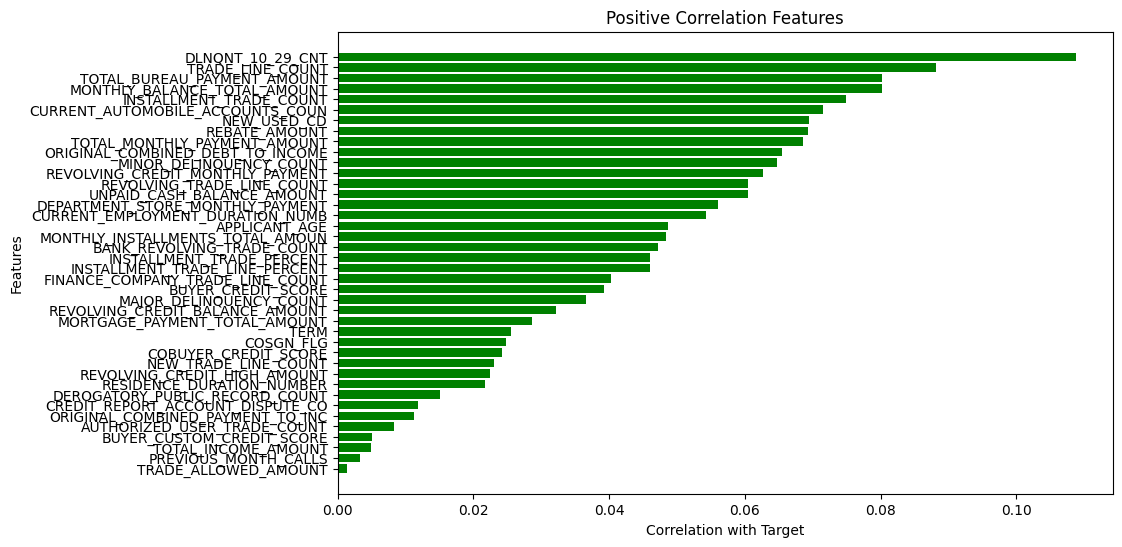

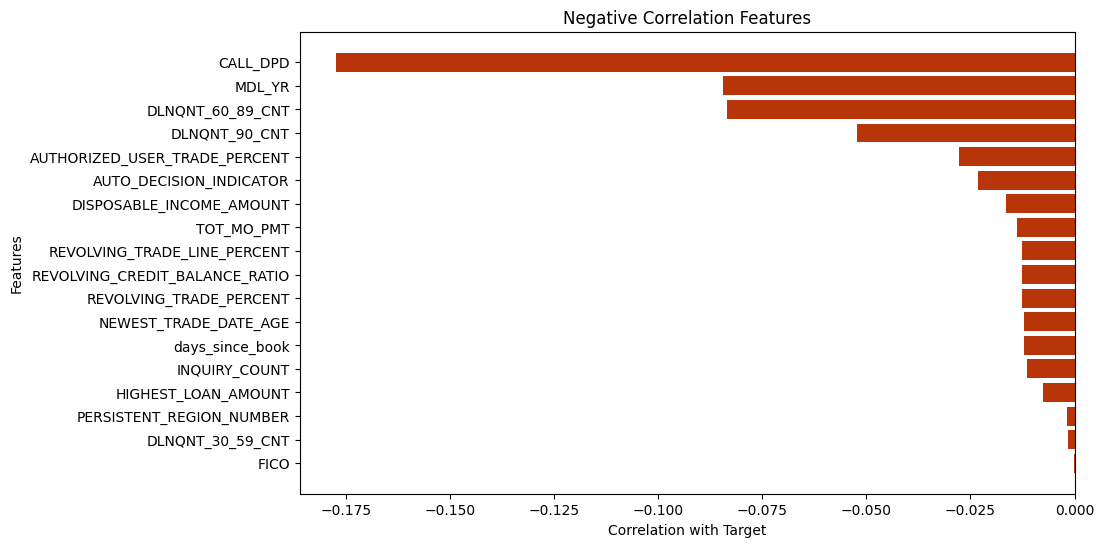

In [41]:
# Compute correlation between top 20 features and target variable
correlations = features.apply(lambda x: x.corr(target))

# Create DataFrame with features and their corresponding correlation
correlation_df = pd.DataFrame({'Feature': features.columns, 'Correlation': correlations}).reset_index(drop=True)

# Sort features by correlation
correlation_df = correlation_df.sort_values(by='Correlation', ascending=False)

# Divide into positive and negative correlations
positive_correlation_features = correlation_df[correlation_df['Correlation'] > 0]
negative_correlation_features = correlation_df[correlation_df['Correlation'] < 0]

# Plot positive correlation features
plt.figure(figsize=(10, 6))
plt.barh(positive_correlation_features['Feature'], positive_correlation_features['Correlation'], color='g')
plt.title('Positive Correlation Features')
plt.xlabel('Correlation with Target')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.show()

# Plot negative correlation features
plt.figure(figsize=(10, 6))
plt.barh(negative_correlation_features['Feature'], negative_correlation_features['Correlation'], color='#B73508')
plt.title('Negative Correlation Features')
plt.xlabel('Correlation with Target')
plt.ylabel('Features')
plt.show()

In [136]:
negative_impact_features

,Feature,Importance,Coefficient
11,CALL_DPD,0.058843,-0.484216
37,TOT_MO_PMT,0.027506,-1.035587
49,HIGHEST_LOAN_AMOUNT,0.027382,-0.027656
32,BUYER_CUSTOM_CREDIT_SCORE,0.026891,-0.056382
0,TOTAL_MONTHLY_PAYMENT_AMOUNT,0.026588,-0.069514
30,DISPOSABLE_INCOME_AMOUNT,0.026390,-0.024222
12,APPLICANT_AGE,0.026243,-0.014876
4,FICO,0.025744,-0.118755
56,days_since_book,0.025523,-0.655716
18,DLNQNT_30_59_CNT,0.024761,-0.346378


In [134]:
top_20_features

,Feature,Importance,Coefficient
11,CALL_DPD,0.058843,-0.484216
17,DLNQNT_10_29_CNT,0.039999,0.847121
37,TOT_MO_PMT,0.027506,-1.035587
49,HIGHEST_LOAN_AMOUNT,0.027382,-0.027656
40,UNPAID_CASH_BALANCE_AMOUNT,0.027252,0.608622
32,BUYER_CUSTOM_CREDIT_SCORE,0.026891,-0.056382
0,TOTAL_MONTHLY_PAYMENT_AMOUNT,0.026588,-0.069514
25,ORIGINAL_COMBINED_DEBT_TO_INCOME,0.026399,0.070372
30,DISPOSABLE_INCOME_AMOUNT,0.026390,-0.024222
28,BUYER_CREDIT_SCORE,0.026299,0.114465


## sequential data creating sequences for each customer

In [234]:
from tensorflow.keras.utils import Sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Masking, LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from tensorflow.keras.layers import Input, Bidirectional, LSTM, Concatenate, Dense, Attention, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split


In [192]:
train_cols = ['Customer_ID', 'CALL_MON_YEAR'] + top_20_features['Feature'].tolist() + ['outcome']
df_train = df_reduced[train_cols]

In [193]:
df_train = df_train.sort_values(by=['Customer_ID', 'CALL_MON_YEAR'])

In [194]:
customers = df_train['Customer_ID'].unique()
sequences = [df_train[df_train['Customer_ID'] == customer].drop(['Customer_ID', "CALL_MON_YEAR"], axis=1).values for customer in customers]

In [203]:
# Separate the sequences into features and targets
sequences_features = [sequence[:, :-1] for sequence in sequences]
sequences_targets = [sequence[:, -1] for sequence in sequences] # Extracting the 'outcome' column for each sequence

# Standardize the features
scaler = StandardScaler()
scaled_sequences_features = []
for sequence in sequences_features:
    scaler.partial_fit(sequence)

for sequence in sequences_features:
    scaled_sequence = scaler.transform(sequence)
    scaled_sequences_features.append(scaled_sequence)

#### Bidirectional LSTM of sliding window 1

In [261]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense, Dropout, Bidirectional, LSTM
from keras.models import Model
import numpy as np
from keras.layers import Flatten

In [263]:
def create_sequences(data, window_size):
    X, y = [], []
    for sequence in data:
        for i in range(len(sequence) - window_size):
            X.append(sequence[i : i + window_size])
            y.append(sequence[i + window_size][-1]) # Assuming the outcome is the last element
    return np.array(X), np.array(y)

window_size = 1
sequences = [np.concatenate([features, targets.reshape(-1, 1)], axis=1) for features, targets in zip(scaled_sequences_features, sequences_targets)]
X_sequences, y_sequences = create_sequences(sequences, window_size)
X_train, X_test, y_train, y_test = train_test_split(X_sequences, y_sequences, test_size=0.2, random_state=42)

# Define the model
input_layer = Input(shape=(window_size, X_train.shape[2]))
bi_lstm = Bidirectional(LSTM(50, return_sequences=True))(input_layer)
flatten = Flatten()(bi_lstm)  # Flatten the outputs of the LSTM
dropout = Dropout(0.5)(flatten)
output_layer = Dense(1, activation='sigmoid')(dropout)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

Epoch 1/10
454/454 [==============================] - 4s 3ms/step - loss: 0.2671 - accuracy: 0.8965 - val_loss: 0.0596 - val_accuracy: 0.9975
Epoch 2/10
454/454 [==============================] - 1s 2ms/step - loss: 0.0240 - accuracy: 0.9995 - val_loss: 0.0068 - val_accuracy: 1.0000
Epoch 3/10
454/454 [==============================] - 1s 2ms/step - loss: 0.0049 - accuracy: 0.9999 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 4/10
454/454 [==============================] - 1s 2ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 9.2598e-04 - val_accuracy: 1.0000
Epoch 5/10
454/454 [==============================] - 1s 2ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 4.9255e-04 - val_accuracy: 1.0000
Epoch 6/10
454/454 [==============================] - 1s 2ms/step - loss: 6.4318e-04 - accuracy: 1.0000 - val_loss: 2.8489e-04 - val_accuracy: 1.0000
Epoch 7/10
454/454 [==============================] - 1s 2ms/step - loss: 4.0713e-04 - accuracy: 1.0000 - val_loss: 1.7934e-04 - val

## training data prep

In [173]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler
X = df_train
Y = df_reduced['outcome']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Apply scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [69]:
rf_classifier = RandomForestClassifier(random_state=42)

# Define hyperparameters for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Get predictions on the test set
y_pred = grid_search.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.9062323693509607
Accuracy: 0.9374149659863945
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.81      0.88      1869
           1       0.93      0.99      0.96      4746

    accuracy                           0.94      6615
   macro avg       0.95      0.90      0.92      6615
weighted avg       0.94      0.94      0.94      6615

Confusion Matrix:
 [[1511  358]
 [  56 4690]]


In [53]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [54]:
from kerastuner.tuners import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional
from tensorflow.keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam
from keras.layers import Dropout
from keras.optimizers import Adam

def create_model(hp):
    # Create model
    model = Sequential()
    model.add(Bidirectional(LSTM(units=hp.Int('units', min_value=32, max_value=256, step=32), 
                                return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))

    model.add(Dropout(rate=hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)))
    
    for i in range(hp.Int('n_layers', 1, 4)):
        model.add(Bidirectional(LSTM(units=hp.Int('units_'+str(i), min_value=32, max_value=256, step=32), 
                                    return_sequences=(i<(hp.Int('n_layers', 1, 4)-1)))))
        model.add(Dropout(rate=hp.Float('dropout_'+str(i+2), min_value=0.0, max_value=0.5, step=0.1)))

    model.add(Dense(1, activation='sigmoid'))

    # Compile model
    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    optimizer = Adam(learning_rate=learning_rate)
    
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model


# Create a tuner
tuner = RandomSearch(
    create_model,
    objective='val_accuracy',
    max_trials=10,  # how many model configurations would you like to test?
    executions_per_trial=1,  # how many trials per variation? (same model could perform differently)
    directory='my_dir',
    project_name='helloworld')

tuner.search_space_summary()

tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"The optimal number of units in the first densely-connected layer is {best_hps.get('units')} and the optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.")

INFO:tensorflow:Reloading Tuner from my_dir\helloworld\tuner0.json
Search space summary
Default search space size: 8
units (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 32, 'step': 8, 'sampling': 'linear'}
layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 4, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 32, 'step': 8, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 32, 'step': 8, 'sampling': 'linear'}
units_final (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 32, 'step': 8, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.001, 'conditions': [], 'values': [0.001, 0.01, 0.1], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 32, 'step': 8, 'sampling': 'linear'}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 3

In [55]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"The optimal number of units in the first densely-connected layer is {best_hps.get('units')} and the optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.")

# Build the model with the optimal hyperparameters
model = tuner.hypermodel.build(best_hps)

# Now, you can fit this model on your data
history =model.fit(X_train, y_train, epochs=150, validation_data=(X_test, y_test))


# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

y_pred = model.predict(X_test)

The optimal number of units in the first densely-connected layer is 32 and the optimal learning rate for the optimizer is 0.01.
Epoch 1/150
827/827 [==============================] - 8s 4ms/step - loss: 0.5413 - accuracy: 0.7359 - val_loss: 0.5304 - val_accuracy: 0.7420
Epoch 2/150
827/827 [==============================] - 2s 3ms/step - loss: 0.5239 - accuracy: 0.7450 - val_loss: 0.5218 - val_accuracy: 0.7450
Epoch 3/150
827/827 [==============================] - 2s 3ms/step - loss: 0.5125 - accuracy: 0.7527 - val_loss: 0.5071 - val_accuracy: 0.7566
Epoch 4/150
827/827 [==============================] - 2s 3ms/step - loss: 0.4969 - accuracy: 0.7620 - val_loss: 0.5097 - val_accuracy: 0.7553
Epoch 5/150
827/827 [==============================] - 2s 3ms/step - loss: 0.4805 - accuracy: 0.7729 - val_loss: 0.4865 - val_accuracy: 0.7699
Epoch 6/150
827/827 [==============================] - 2s 3ms/step - loss: 0.4619 - accuracy: 0.7806 - val_loss: 0.4704 - val_accuracy: 0.7782
Epoch 7/150
82

In [19]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)

print("Test Accuracy: ", accuracy)

207/207 [==============================] - 0s 1ms/step - loss: 0.6792 - accuracy: 0.9058
Test Accuracy:  0.9058201313018799


### test on all data

In [58]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
X_all = df_reduced.drop(['outcome', 'Customer_ID', 'CALL_MON_YEAR'], axis=1)
Y_all = df_reduced['outcome']

# Split into train and test sets
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, Y_all, test_size=0.2, random_state=42)

# Apply scaling
scaler = StandardScaler()
X_train_all = scaler.fit_transform(X_train_all)
X_test_all = scaler.transform(X_test_all)

X_train_all = np.reshape(X_train_all, (X_train_all.shape[0], 1, X_train_all.shape[1]))
X_test_all = np.reshape(X_test_all, (X_test_all.shape[0], 1, X_test_all.shape[1]))

In [65]:
def create_model(hp):
    # Create model
    model = Sequential()
    model.add(Bidirectional(LSTM(units=hp.Int('units', min_value=32, max_value=256, step=32), 
                                return_sequences=True), input_shape=(X_train_all.shape[1], X_train_all.shape[2])))

    model.add(Dropout(rate=hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)))
    
    for i in range(hp.Int('n_layers', 1, 4)):
        model.add(Bidirectional(LSTM(units=hp.Int('units_'+str(i), min_value=32, max_value=256, step=32), 
                                    return_sequences=(i<(hp.Int('n_layers', 1, 4)-1)))))
        model.add(Dropout(rate=hp.Float('dropout_'+str(i+2), min_value=0.0, max_value=0.5, step=0.1)))

    model.add(Dense(1, activation='sigmoid'))

    # Compile model
    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    optimizer = Adam(learning_rate=learning_rate)
    
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model

    
# Create a tuner
tuner = RandomSearch(
    create_model,
    objective='val_accuracy',
    max_trials=10,  # how many model configurations would you like to test?
    executions_per_trial=1,  # how many trials per variation? (same model could perform differently)
    directory='my_dir',
    project_name='helloworld')

tuner.search_space_summary()

tuner.search(X_train_all, y_train_all, epochs=10, validation_data=(X_test_all, y_test_all))

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"The optimal number of units in the first densely-connected layer is {best_hps.get('units')} and the optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.")

INFO:tensorflow:Reloading Tuner from my_dir\helloworld\tuner0.json
Search space summary
Default search space size: 8
units (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 32, 'step': 8, 'sampling': 'linear'}
layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 4, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 32, 'step': 8, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 32, 'step': 8, 'sampling': 'linear'}
units_final (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 32, 'step': 8, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.001, 'conditions': [], 'values': [0.001, 0.01, 0.1], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 32, 'step': 8, 'sampling': 'linear'}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 3

In [67]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"The optimal number of units in the first densely-connected layer is {best_hps.get('units')} and the optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.")

# Build the model with the optimal hyperparameters
model = tuner.hypermodel.build(best_hps)

# Now, you can fit this model on your data
history =model.fit(X_train_all, y_train_all, epochs=150, validation_data=(X_test_all, y_test_all))


# Evaluate the model
loss, accuracy = model.evaluate(X_test_all, y_test_all)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

y_pred = model.predict(X_test_all)

The optimal number of units in the first densely-connected layer is 32 and the optimal learning rate for the optimizer is 0.01.
Epoch 1/150
827/827 [==============================] - 7s 3ms/step - loss: 0.5371 - accuracy: 0.7381 - val_loss: 0.5159 - val_accuracy: 0.7504
Epoch 2/150
827/827 [==============================] - 2s 3ms/step - loss: 0.4917 - accuracy: 0.7651 - val_loss: 0.4967 - val_accuracy: 0.7598
Epoch 3/150
827/827 [==============================] - 2s 3ms/step - loss: 0.4455 - accuracy: 0.7891 - val_loss: 0.4720 - val_accuracy: 0.7775
Epoch 4/150
827/827 [==============================] - 2s 3ms/step - loss: 0.4025 - accuracy: 0.8131 - val_loss: 0.4484 - val_accuracy: 0.7920
Epoch 5/150
827/827 [==============================] - 2s 3ms/step - loss: 0.3582 - accuracy: 0.8390 - val_loss: 0.4228 - val_accuracy: 0.8110
Epoch 6/150
827/827 [==============================] - 2s 3ms/step - loss: 0.3184 - accuracy: 0.8585 - val_loss: 0.4044 - val_accuracy: 0.8249
Epoch 7/150
82

## sequential model

In [79]:
df_reduced

,Customer_ID,CALL_MON_YEAR,TOTAL_MONTHLY_PAYMENT_AMOUNT,TOTAL_BUREAU_PAYMENT_AMOUNT,REVOLVING_TRADE_LINE_COUNT,REVOLVING_TRADE_LINE_PERCENT,FICO,REVOLVING_CREDIT_MONTHLY_PAYMENT,REVOLVING_CREDIT_HIGH_AMOUNT,REVOLVING_CREDIT_BALANCE_AMOUNT,...,INQUIRY_COUNT,HIGHEST_LOAN_AMOUNT,REVOLVING_CREDIT_BALANCE_RATIO,FINANCE_COMPANY_TRADE_LINE_COUNT,DEPARTMENT_STORE_MONTHLY_PAYMENT,CURRENT_EMPLOYMENT_DURATION_NUMB,CURRENT_AUTOMOBILE_ACCOUNTS_COUN,CREDIT_REPORT_ACCOUNT_DISPUTE_CO,days_since_book,PREVIOUS_MONTH_CALLS
0,7350,2023-05,310,17,1,100,775,0,2000,17,...,2,2000,100,0,0,3,0,0,661,0.0
1,8328,2023-01,1972,0,0,0,613,28,0,0,...,4,16887,0,0,0,1,1,0,1050,0.0
2,8328,2023-02,1972,0,0,0,613,28,0,0,...,4,16887,0,0,0,1,1,0,1078,8.0
3,8328,2023-03,1972,0,0,0,613,28,0,0,...,4,16887,0,0,0,1,1,0,1106,8.0
4,8328,2023-04,1972,0,0,0,613,28,0,0,...,4,16887,0,0,0,1,1,0,1128,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33069,99987007,2023-02,1243,746,3,6,756,38,1805,163,...,5,27514,6,46,38,20,1,0,786,0.0
33070,99987007,2023-03,1243,746,3,6,756,38,1805,163,...,5,27514,6,46,38,20,1,0,810,3.0
33071,99992127,2023-03,612,70,4,57,745,0,8700,1394,...,3,7200,57,1,0,5,0,0,163,0.0
33072,99992127,2023-04,612,70,4,57,745,0,8700,1394,...,3,7200,57,1,0,5,0,0,220,2.0


In [80]:
cols = ['Customer_ID', 'CALL_MON_YEAR'] + top_20_features['Feature'].tolist() + ['outcome']
df_sequential= df_reduced[cols]
df_sequential

,Customer_ID,CALL_MON_YEAR,CALL_DPD,DLNQNT_10_29_CNT,TOT_MO_PMT,HIGHEST_LOAN_AMOUNT,UNPAID_CASH_BALANCE_AMOUNT,BUYER_CUSTOM_CREDIT_SCORE,TOTAL_MONTHLY_PAYMENT_AMOUNT,ORIGINAL_COMBINED_DEBT_TO_INCOME,...,PREVIOUS_MONTH_CALLS,FICO,days_since_book,TOTAL_INCOME_AMOUNT,TOTAL_BUREAU_PAYMENT_AMOUNT,DLNQNT_30_59_CNT,DLNQNT_60_89_CNT,MONTHLY_BALANCE_TOTAL_AMOUNT,DLNQNT_90_CNT,outcome
0,7350,2023-05,35,1,293.78,2000,14464.55,779,310,6.21,...,0.0,775,661,5000,17,1,0,17,0,0
1,8328,2023-01,69,16,599.49,16887,27926.90,599,1972,46.43,...,0.0,613,1050,8140,0,13,7,0,0,0
2,8328,2023-02,69,16,599.49,16887,27926.90,599,1972,46.43,...,8.0,613,1078,8140,0,13,7,0,0,0
3,8328,2023-03,69,16,599.49,16887,27926.90,599,1972,46.43,...,8.0,613,1106,8140,0,13,7,0,0,0
4,8328,2023-04,69,16,599.49,16887,27926.90,599,1972,46.43,...,8.0,613,1128,8140,0,13,7,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33069,99987007,2023-02,21,19,621.68,27514,29235.00,686,1243,24.74,...,0.0,756,786,6600,746,15,5,746,1,0
33070,99987007,2023-03,21,19,621.68,27514,29235.00,686,1243,24.74,...,3.0,756,810,6600,746,15,5,746,1,0
33071,99992127,2023-03,10,0,555.58,7200,33521.00,708,612,12.23,...,0.0,745,163,5000,70,0,0,70,0,1
33072,99992127,2023-04,10,0,555.58,7200,33521.00,708,612,12.23,...,2.0,745,220,5000,70,0,0,70,0,1


In [90]:
df_sequential[['Customer_ID', 'CALL_MON_YEAR', 'outcome']][df_sequential['Customer_ID'] == 8328]

,Customer_ID,CALL_MON_YEAR,outcome
1,8328,2023-01,0
2,8328,2023-02,0
3,8328,2023-03,0
4,8328,2023-04,0


In [84]:
df_sequential = df_sequential.sort_values(by=['Customer_ID', 'CALL_MON_YEAR'])

In [83]:
customers = df_sequential['Customer_ID'].unique()
len(customers)

14918

In [296]:
df_sequential

,Customer_ID,CALL_MON_YEAR,CALL_DPD,DLNQNT_10_29_CNT,TOT_MO_PMT,HIGHEST_LOAN_AMOUNT,UNPAID_CASH_BALANCE_AMOUNT,BUYER_CUSTOM_CREDIT_SCORE,TOTAL_MONTHLY_PAYMENT_AMOUNT,ORIGINAL_COMBINED_DEBT_TO_INCOME,...,PREVIOUS_MONTH_CALLS,FICO,days_since_book,TOTAL_INCOME_AMOUNT,TOTAL_BUREAU_PAYMENT_AMOUNT,DLNQNT_30_59_CNT,DLNQNT_60_89_CNT,MONTHLY_BALANCE_TOTAL_AMOUNT,DLNQNT_90_CNT,outcome
0,7350,2023-05,35,1,293.78,2000,14464.55,779,310,6.21,...,0.0,775,661,5000,17,1,0,17,0,0
1,8328,2023-01,69,16,599.49,16887,27926.90,599,1972,46.43,...,0.0,613,1050,8140,0,13,7,0,0,0
2,8328,2023-02,69,16,599.49,16887,27926.90,599,1972,46.43,...,8.0,613,1078,8140,0,13,7,0,0,0
3,8328,2023-03,69,16,599.49,16887,27926.90,599,1972,46.43,...,8.0,613,1106,8140,0,13,7,0,0,0
4,8328,2023-04,69,16,599.49,16887,27926.90,599,1972,46.43,...,8.0,613,1128,8140,0,13,7,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33069,99987007,2023-02,21,19,621.68,27514,29235.00,686,1243,24.74,...,0.0,756,786,6600,746,15,5,746,1,0
33070,99987007,2023-03,21,19,621.68,27514,29235.00,686,1243,24.74,...,3.0,756,810,6600,746,15,5,746,1,0
33071,99992127,2023-03,10,0,555.58,7200,33521.00,708,612,12.23,...,0.0,745,163,5000,70,0,0,70,0,1
33072,99992127,2023-04,10,0,555.58,7200,33521.00,708,612,12.23,...,2.0,745,220,5000,70,0,0,70,0,1


In [297]:
df.columns

Index(['Customer_ID', 'BOOK_DT', 'FICO', 'ORIGINAL_LOAN_AMOUNT', 'TOT_MO_PMT',
       'TERM', 'NEW_USED_CD', 'LTV', 'COSGN_FLG', 'MDL_YR',
       'COBUYER_CUSTOM_CREDIT_SCORE', 'BUYER_CUSTOM_CREDIT_SCORE',
       'TOTAL_INCOME_AMOUNT', 'DISPOSABLE_INCOME_AMOUNT',
       'AUTO_DECISION_INDICATOR', 'BUYER_CREDIT_SCORE', 'COBUYER_CREDIT_SCORE',
       'INSTALLMENT_TRADE_PERCENT', 'ORIGINAL_COMBINED_DEBT_TO_INCOME',
       'ORIGINAL_COMBINED_PAYMENT_TO_INC', 'REBATE_AMOUNT',
       'REVOLVING_TRADE_PERCENT', 'TRADE_ALLOWED_AMOUNT',
       'UNPAID_CASH_BALANCE_AMOUNT', 'CALL_START_DATE',
       'REVOLVING_CREDIT_BALANCE_RATIO', 'CREDIT_REPORT_ACCOUNT_DISPUTE_CO',
       'CURRENT_AUTOMOBILE_ACCOUNTS_COUN', 'CURRENT_EMPLOYMENT_DURATION_NUMB',
       'DEPARTMENT_STORE_MONTHLY_PAYMENT', 'DEPARTMENT_STORE_TRADE_COUNT',
       'EVER_TRADE_PERCENT', 'FINANCE_COMPANY_TRADE_LINE_COUNT',
       'HIGHEST_LOAN_AMOUNT', 'INSTALLMENT_TRADE_COUNT', 'INQUIRY_COUNT',
       'INSTALLMENT_TRADE_LINE_PERCENT',